# Predicting Employee Attrition

Uncover the factors that cause employees to leave the organization and explore important questions such as ‘compare average monthly income by education and attrition’ or ‘is distance from home a case for attrition’?

Build classification models to predict which employee is likely to churn and help the business to devise policies and attract back the right talent.

# Importing All Required Libraries

In [47]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns',None)
pd.set_option('display.max_row',None)
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

## Reading File

In [48]:
ea=pd.read_csv(r"E:\Imarticus\R\Project\R\R Project - Attrition\Attrition.csv")

### Checking data shape (row and column count) & observe few of records

In [3]:
ea.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
ea.tail()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8
1469,34,No,Travel_Rarely,628,Research & Development,8,3,Medical,1,2068,2,Male,82,4,2,Laboratory Technician,3,Married,4404,10228,2,Y,No,12,3,1,80,0,6,3,4,4,3,1,2


In [5]:
ea.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
ea.shape

(1470, 35)

In [7]:
ea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

### checking for columns conatining single unique category 

In [8]:
for column in ea.columns:
    print(f"{column}: Number of unique values {ea[column].nunique()}")

Age: Number of unique values 43
Attrition: Number of unique values 2
BusinessTravel: Number of unique values 3
DailyRate: Number of unique values 886
Department: Number of unique values 3
DistanceFromHome: Number of unique values 29
Education: Number of unique values 5
EducationField: Number of unique values 6
EmployeeCount: Number of unique values 1
EmployeeNumber: Number of unique values 1470
EnvironmentSatisfaction: Number of unique values 4
Gender: Number of unique values 2
HourlyRate: Number of unique values 71
JobInvolvement: Number of unique values 4
JobLevel: Number of unique values 5
JobRole: Number of unique values 9
JobSatisfaction: Number of unique values 4
MaritalStatus: Number of unique values 3
MonthlyIncome: Number of unique values 1349
MonthlyRate: Number of unique values 1427
NumCompaniesWorked: Number of unique values 10
Over18: Number of unique values 1
OverTime: Number of unique values 2
PercentSalaryHike: Number of unique values 15
PerformanceRating: Number of uni

#### From above output now we know that columns "EmployeeCount ", "Over18 ","StandardHours" has single unique value and hence do not has any impact on decision making.

In [49]:
ea.drop(['EmployeeCount','Over18','StandardHours'],inplace=True,axis=1)

# Finding Nulls

In [30]:
ea.isnull().sum()   #No Null Values

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

# Data Distribution Between Output Classes

#### Lets convert our target variable into numeric categories so we can plot pie plot 

In [50]:
ea.Attrition.replace({"Yes":1,"No":0},inplace=True)

In [32]:
ea["Attrition"].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

([<matplotlib.patches.Wedge at 0x142a3548>,
 [Text(-0.9618916732177651, 0.5336332157899547, 'No_attrition'),
  Text(0.961891673217765, -0.5336332157899547, 'Yes_attrition')],
 [Text(-0.5246681853915082, 0.29107266315815705, '84%'),
  Text(0.5246681853915082, -0.2910726631581571, '16%')])

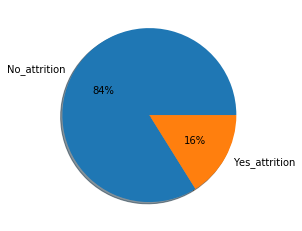

In [13]:
plt.pie(ea["Attrition"].value_counts(),labels=['No_attrition','Yes_attrition'],autopct='%1.0f%%',shadow=True)

#### we can find that about 84% of people stick to the company while rest of them quit(Data is unbalances)

# Finding Correlation Between Variables

In [51]:
ea.MaritalStatus.replace({"Divorced":0,"Married":1,"Single":2},inplace=True)

In [34]:
ea_corr=ea.corr()

In [35]:
ea_corr

,Age,Attrition,DailyRate,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.010661,-0.001686,0.208034,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,-0.056652,0.077924,-0.031373,-0.010577,-0.103369,-0.006846,-0.130016,-0.169105,-0.103481,0.162070,-0.159840,0.015170,0.043494,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
DailyRate,0.010661,-0.056652,1.000000,-0.004985,-0.016806,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,0.077924,-0.004985,1.000000,0.021042,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,-0.016806,0.021042,1.000000,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeNumber,-0.010145,-0.010577,-0.050990,0.032916,0.042070,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.008155,-0.014829,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,-0.103369,0.018355,-0.016075,-0.027128,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.003593,-0.006259,0.037600,0.012594,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,-0.006846,0.023381,0.031131,0.016775,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.017861,-0.015794,-0.015297,0.022157,-0.009062,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,-0.130016,0.046135,0.008783,0.042438,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.038497,-0.015271,-0.016322,0.015012,-0.017205,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,-0.169105,0.002966,0.005303,0.101589,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,-0.076769,0.950300,0.039563,0.142501,-0.034730,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


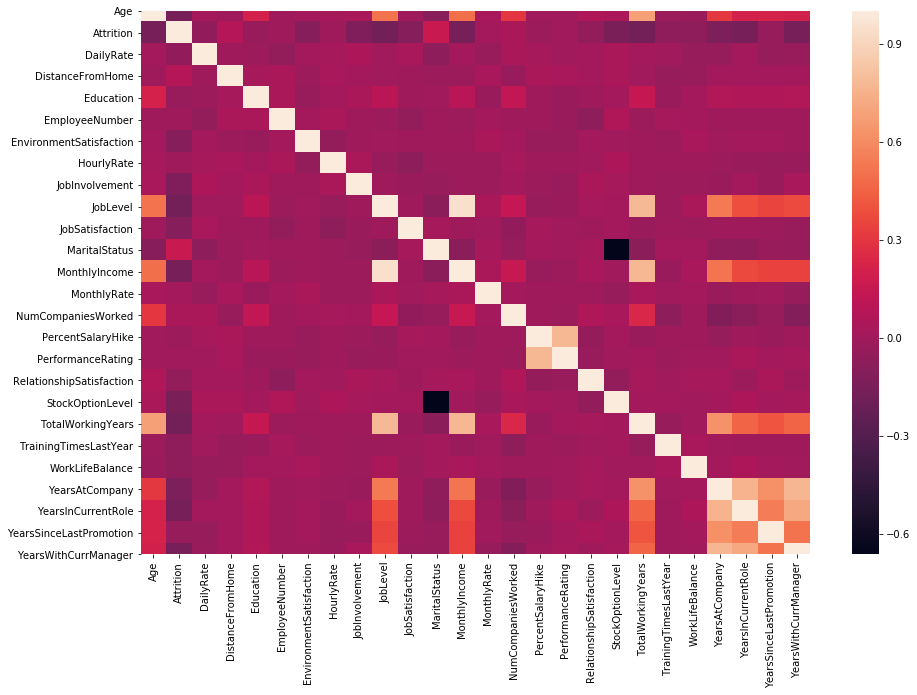

In [36]:
plt.rcParams["figure.figsize"] = [15,10]
sns.heatmap(ea_corr,xticklabels=ea_corr.columns,yticklabels=ea_corr.columns)

####   Analysis of correlation results (sample analysis)
       1. Monthly income is highly correlated with Job level.
       2. Job level is highly correlated with total working year.
       3. Monthly income is highly correlated with total working year.
       4. Age is also positively correlated with the Total working year.
       5. Marital status and stock option level are negatively correlated.

# Age Analysis

(array([  0.,  17., 309., 622., 349., 168.,   5.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

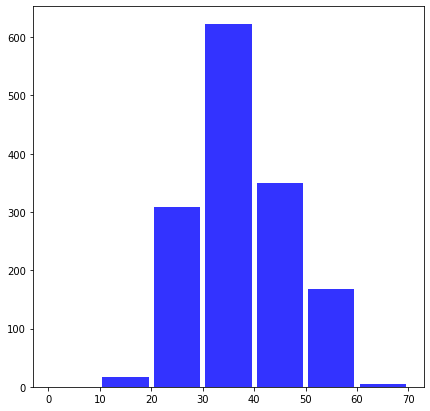

In [18]:
plt.rcParams["figure.figsize"] = [7,7]
plt.hist(ea['Age'],bins=np.arange(0,80,10),alpha=0.8,rwidth=0.9,color='blue')  #Plot to see distribution of age overall

#### Finding based on above plot
This plot tells that there are more employees in the range of 30 to 40. Approximately 45% of employees fall in this range.

In [19]:
positive_attrition_df =ea.loc[ea['Attrition']==1]
negative_attrition_df =ea.loc[ea['Attrition']==0]   ###let us take only employee who are likely to quit.

(array([ 0., 10., 81., 89., 34., 23.,  0.]),
 array([ 0, 10, 20, 30, 40, 50, 60, 70]),
 <a list of 7 Patch objects>)

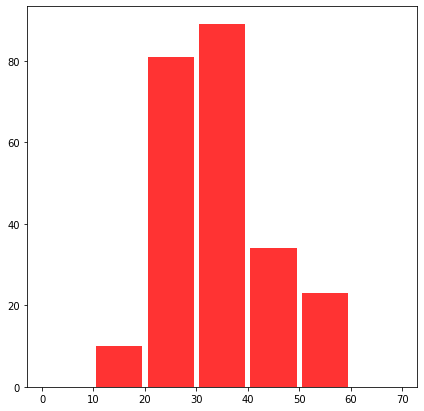

In [20]:
plt.hist(positive_attrition_df['Age'], bins=np.arange(0,80,10), alpha=0.8, rwidth=0.9, color='red')

#### Findings based on above plot
     1. Employees whose age is in the range of 30 - 40 are more likely to quit.
     2. Employees in the range of 20 to 30 are also equally imposing the threat to employers.

# Business Travel vs Attrition

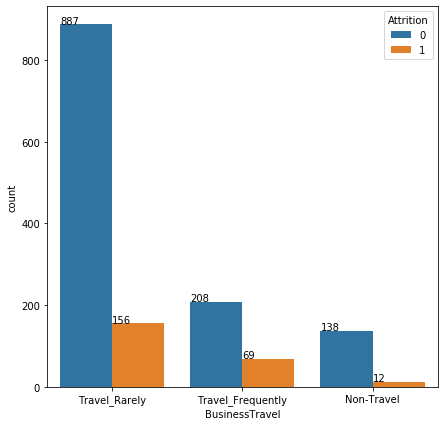

In [21]:
ax=sns.countplot(x="BusinessTravel",hue="Attrition",data=ea)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

#### Findings
From the above plot it can be inferred that travel can not be a compelling factor for attrition. Employee who travel frequently are likely to quit more. 

# Department Vs Attrition

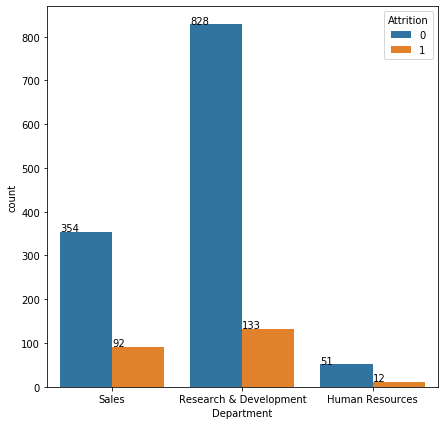

In [22]:
ax=sns.countplot(x="Department",hue="Attrition",data=ea)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

#### Inference:
1. 56% of employess from research and development department are likely to quit.
2. 38% of employees from sales department are likely to quit. 

# Distance from home Vs Employee Attrition

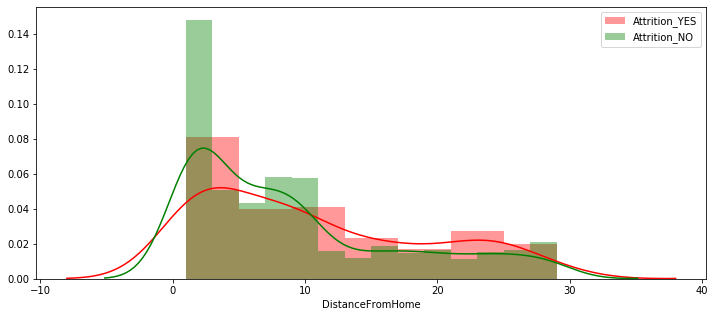

In [24]:
plt.figure(figsize=(12,5))
sns.distplot(positive_attrition_df["DistanceFromHome"],color="red",label= "Attrition_YES")
sns.distplot(negative_attrition_df["DistanceFromHome"],color="green", label= "Attrition_NO")
plt.legend()di

#### Findings-
 1. Distance from Home is not crucial cause for employee to leave the job.
 2. People who live closeby (0-10 miles) are likely to quit more based on the data.

# Education vs Attrition

#### There are five categories:

 1. Below College - 1 
 2. College - 2
 3. Bachelor - 3
 4. Master - 4
 5. Doctor - 5 

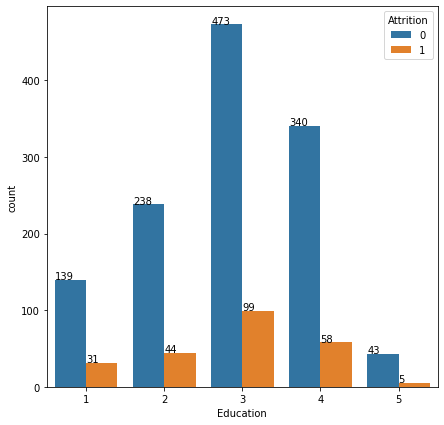

In [26]:
ax=sns.countplot(x="Education",hue="Attrition",data=ea)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

#### Inference:

1. 41% of employees having bachelor's degree are likely to quit.
2. 24% of employees having master's are the next in line. 

# Gender vs Attrition

In [36]:
pd.crosstab(columns=[ea.Attrition],index=[ea.Gender],margins=True,normalize='index')

Attrition,0,1
Gender,,
0,0.852041,0.147959
1,0.829932,0.170068
All,0.838776,0.161224


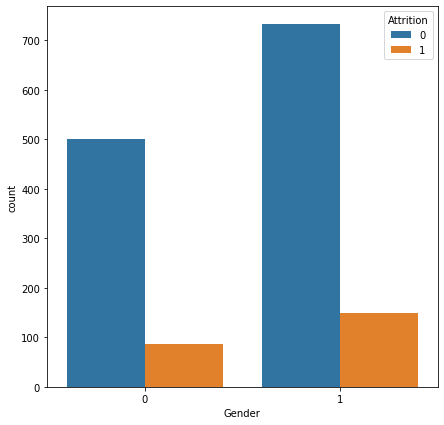

In [37]:
sns.countplot(x="Gender",hue="Attrition",data=ea)

#### Findings-
From the above plot, we can infer that male employees are likely to leave organization as their attrition amount is higher compared to female.

# Job Role Vs Attrition

In [38]:
pd.crosstab(columns=[ea.Attrition],index=[ea.JobRole],margins=True,normalize='index')

Attrition,0,1
JobRole,,
0,0.931298,0.068702
1,0.769231,0.230769
2,0.760618,0.239382
3,0.950980,0.049020
4,0.931034,0.068966
5,0.975000,0.025000
6,0.839041,0.160959
7,0.825153,0.174847
8,0.602410,0.397590


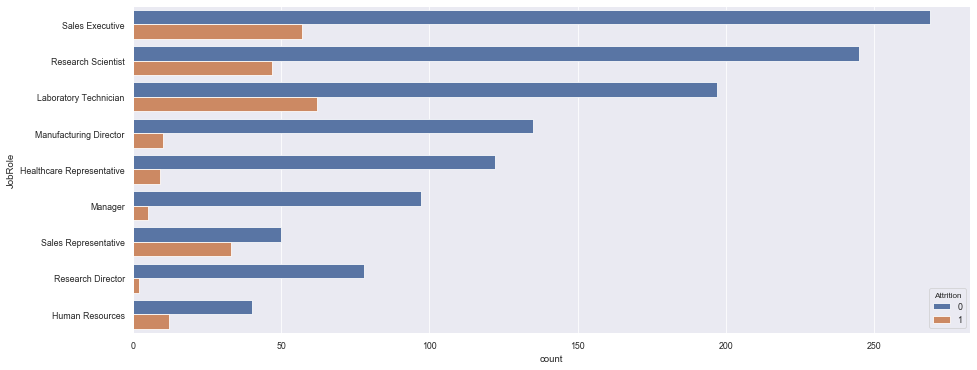

In [33]:
sns.set_context("paper")
plt.figure(figsize=(15,6))
sns.countplot(y="JobRole",hue="Attrition",data=ea)

### Findings-
Top three roles facing attrition

1. 26% of employees who are likely to quit belong to Laboratory Technician group.
2. 24% of employees belong to Sales Executive group.
3. 19% of employees belong to Research Scientist group.

# Marital Status vs Attrition

In [29]:
pd.crosstab(columns=[ea.Attrition],index=[ea.MaritalStatus],margins=True,normalize='index')

Attrition,0,1
MaritalStatus,,
Divorced,0.899083,0.100917
Married,0.875186,0.124814
Single,0.744681,0.255319
All,0.838776,0.161224


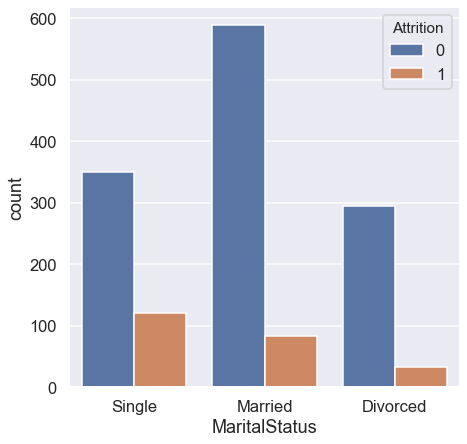

In [32]:
sns.set_context("talk")
sns.countplot(x="MaritalStatus",hue="Attrition",data=ea)

#### Inference:
Nearly 50 % of the employees who are single are likely to quit. 

# Monthly Income vs Attrition

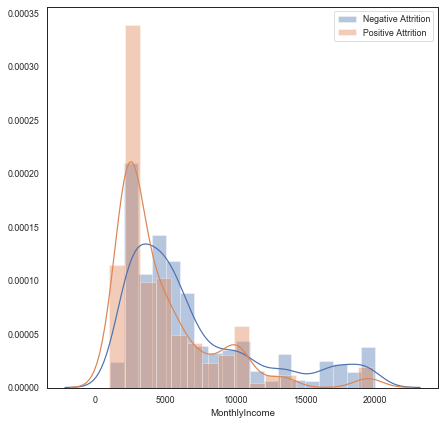

In [37]:
sns.set_style("white")
sns.distplot(negative_attrition_df['MonthlyIncome'],label="Negative Attrition")
sns.distplot(positive_attrition_df['MonthlyIncome'],label="Positive Attrition")
plt.legend()

#### Inference-
Looks like people who are less likely to leave the company are the ones who are less paid.

# Over Time vs Attrition

In [38]:
pd.crosstab(columns=[ea.Attrition],index=[ea.OverTime],margins=True,normalize='index')

Attrition,0,1
OverTime,,
No,0.895636,0.104364
Yes,0.694712,0.305288
All,0.838776,0.161224


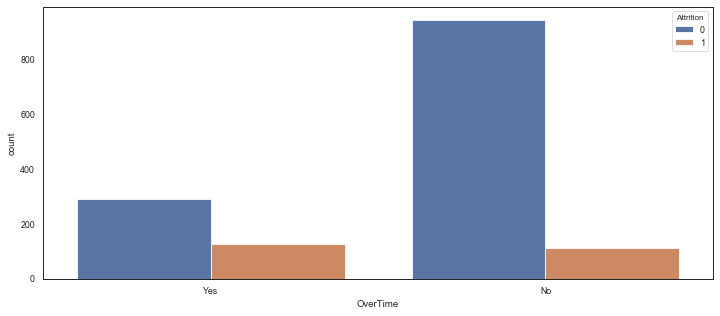

In [40]:
plt.figure(figsize=(12,5))
sns.countplot(x="OverTime",hue="Attrition",data=ea)

#### Findings-
People who are doing Overtime has highest attrition rate.

# Attrition vs Percent Salary Hike

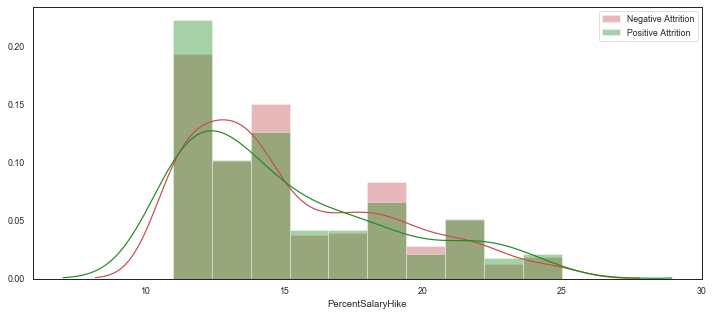

In [43]:
plt.figure(figsize=(12,5))
sns.distplot(negative_attrition_df['PercentSalaryHike'],bins=10,color="r",label="Negative Attrition")
sns.distplot(positive_attrition_df['PercentSalaryHike'],bins=10,color="forestgreen",label="Positive Attrition")
plt.legend()

#### Findings-
People who recieved below 19 % salary hike has highest attrition rate.

# Attrition vs Dailyrate

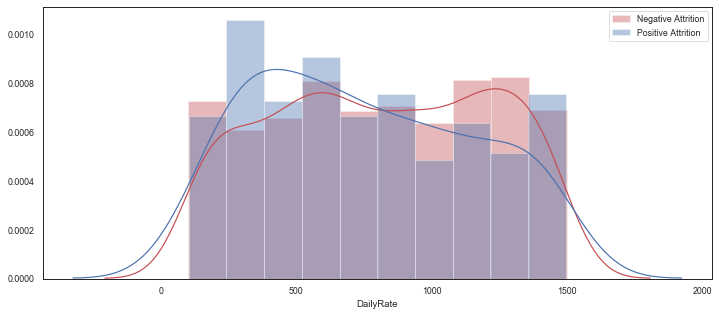

In [45]:
plt.figure(figsize=(12,5))
sns.distplot(negative_attrition_df['DailyRate'],bins=10,color="r",label="Negative Attrition")
sns.distplot(positive_attrition_df['DailyRate'],bins=10,color="b",label="Positive Attrition")
plt.legend()

#### Findings-
There is almost same pattern of Daily Rate for both postive and negative attrition. Hence this column has minimal impact on decision making.

# Attrition vs Environment Satisfaction

#### EnvironmentSatisfaction 
1  'Low' 
2  'Medium' 
3  'High' 
4  'Very High' 

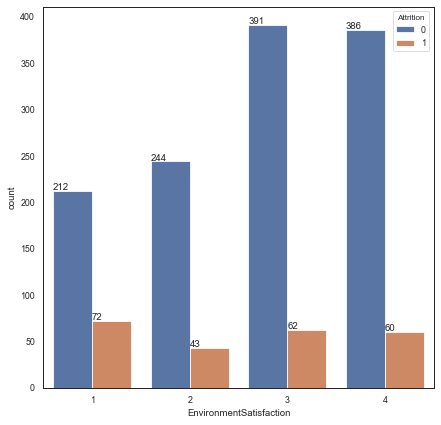

In [47]:
ax=sns.countplot(x="EnvironmentSatisfaction",hue="Attrition",data=ea)
for p in ax.patches:
    ax.annotate('{}'.format(p.get_height()), (p.get_x(), p.get_height()+1))

#### High attrtition rate in employees having low environment satisfaction.  

# Educational Field vs Attrition

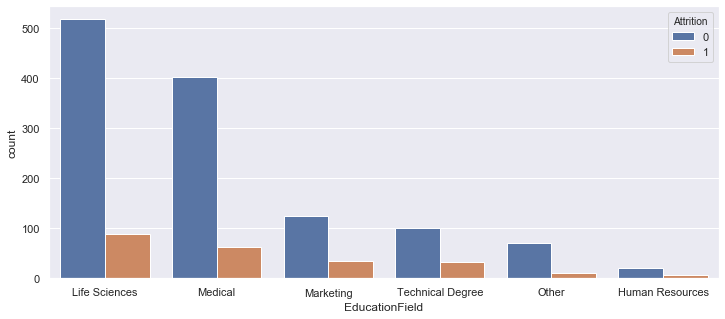

In [37]:
sns.set()
plt.figure(figsize=(12,5))
sns.countplot(x="EducationField", hue="Attrition", data=ea, order = ea["EducationField"].value_counts().index)

#### Findings-

It is not showing more impact on attarition rate.

# Attrition vs Job Involvement

#### JobInvolvement 
1 'Low' 2 'Medium' 3 'High' 4 'Very High' 

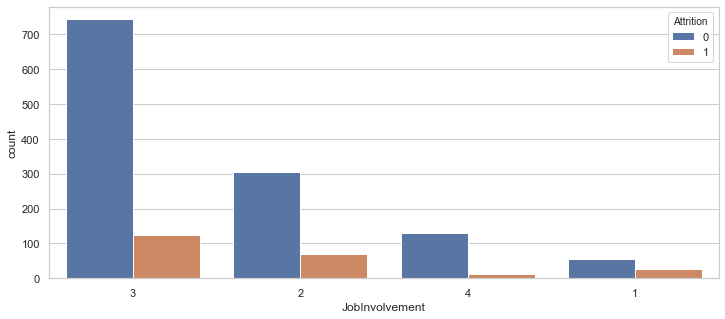

In [38]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,5))
sns.countplot(x="JobInvolvement", hue="Attrition", data=ea, order = ea["JobInvolvement"].value_counts().index)

#### Findings-
People with very high job involvement has lowest Attrition. 

# Attrition vs JobLevel

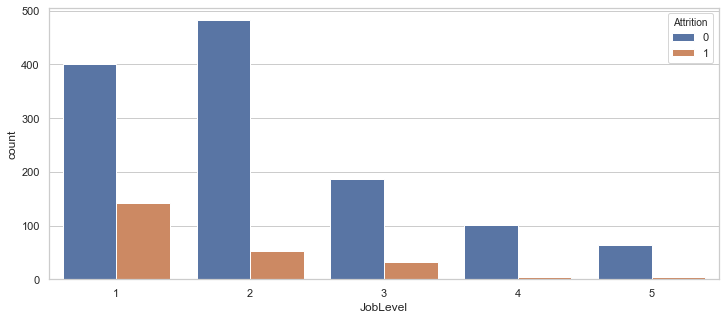

In [39]:
plt.figure(figsize=(12,5))
sns.countplot(x="JobLevel", hue="Attrition", data=ea, order = ea["JobLevel"].value_counts().index)

#### Findings-
Job-level 4 & 5 has lowest Attrition. 

# Attrition vs JobSatisfaction

#### JobSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High' 

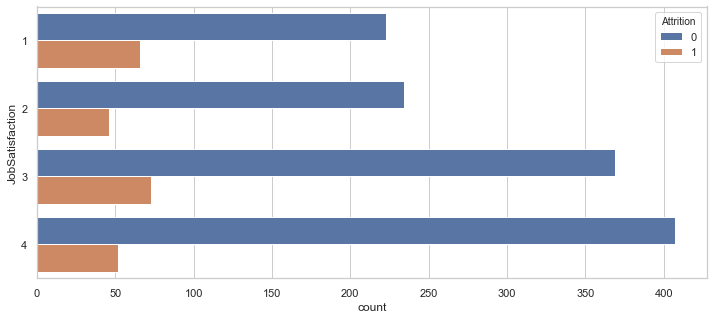

In [41]:
plt.figure(figsize=(12,5))
sns.countplot(y="JobSatisfaction", hue="Attrition", data=ea)

#### Findings-
Proportion of Leaving Employees decreases as the Job Satisfaction score increases.

# Number of Companies Worked vs Attrition

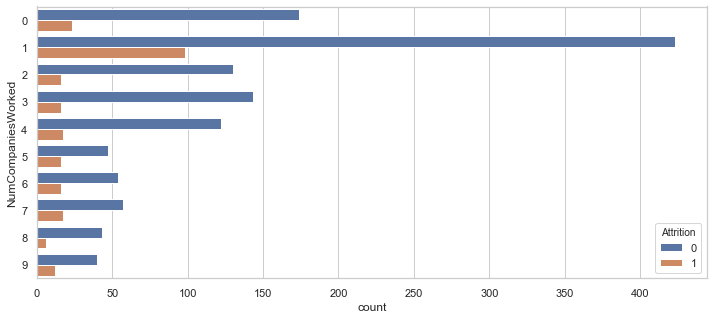

In [42]:
plt.figure(figsize=(12,5))
sns.countplot(y="NumCompaniesWorked", hue="Attrition", data=ea)

#### Findings-
Employees that have already worked at several companies previously show higher proportion of leavers.

# PerformanceRating vs Attrition 

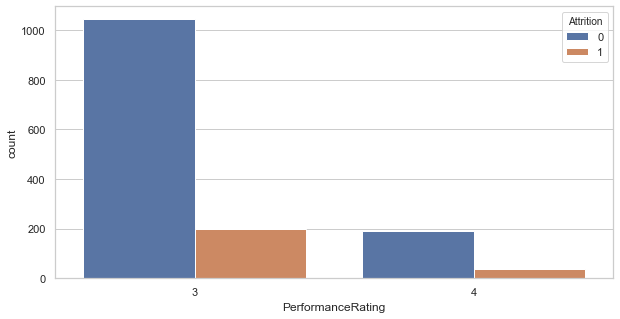

In [43]:
plt.figure(figsize=(10,5))
sns.countplot(x="PerformanceRating", hue="Attrition", data=ea)

#### Findings-
No significant insights from available data.

# Attrition vs Relationship Satisfaction

#### RelationshipSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High' 

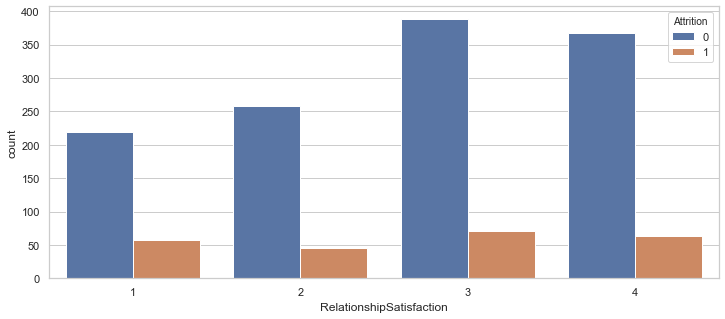

In [45]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,5))
sns.countplot(x="RelationshipSatisfaction", hue="Attrition", data=ea)

#### High attrition rate in employees having low relationship satisfaction.

# Stock Option Level vs Attrition

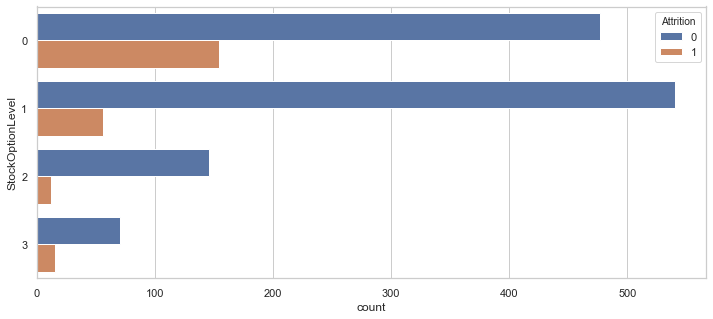

In [46]:
plt.figure(figsize=(12,5))
sns.countplot(y="StockOptionLevel", hue="Attrition", data=ea)

#### Relatively high attrtion rate in employees who has stock option level 0. 

# Total Working Years vs Attrition 

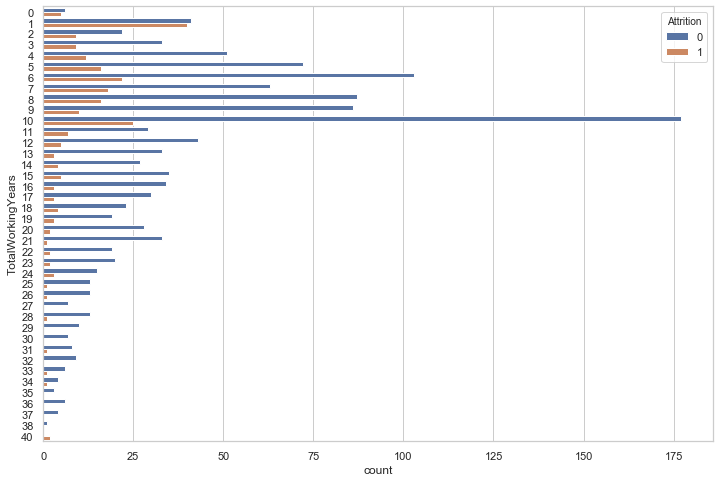

In [47]:
plt.figure(figsize=(12,8))
sns.countplot(y="TotalWorkingYears", hue="Attrition", data=ea)

#### Findings-
High attrtion rate in people who's working experience is below 13 years.

# WorkLife Balance vs Attrition

#### WorkLifeBalance 
1 'Bad' 2 'Good' 3 'Better' 4 'Best'

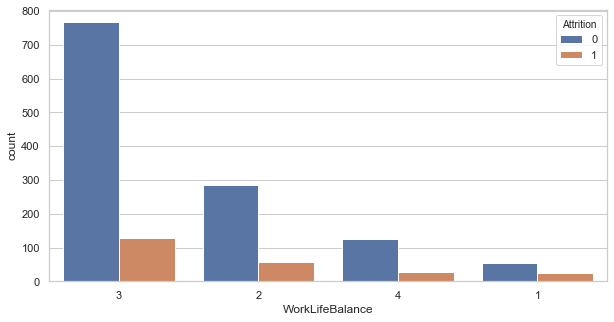

In [48]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(x="WorkLifeBalance", hue="Attrition", data=ea,order = ea["WorkLifeBalance"].value_counts().index)

#### Findings-
The data indicates that the largest normalised proportion of Leavers had "Bad" Work-Life Balance.

# Years At Company vs Attrition

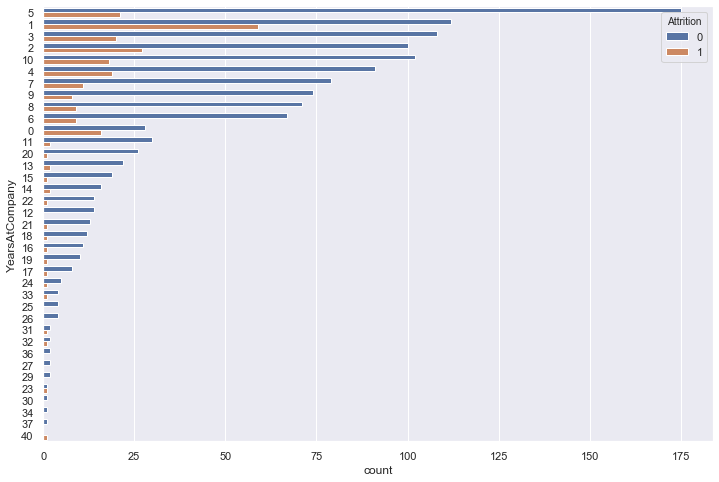

In [49]:
sns.set(style="darkgrid")
plt.figure(figsize=(12,8))
sns.countplot(y="YearsAtCompany", hue="Attrition", data=ea, order = ea["YearsAtCompany"].value_counts().index)

#### Findings-
Reatively high proportion of attrition rate for an employees who has spend below than <11 years at company. 

# Years In Current Role vs Attrition

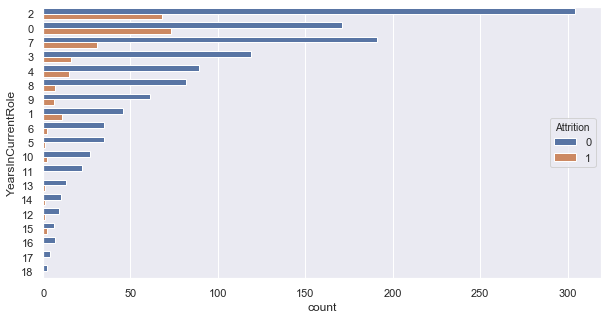

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(y="YearsInCurrentRole", hue="Attrition", data=ea, order = ea["YearsInCurrentRole"].value_counts().index)

#### Findings-
High attrition rate in employees who has spend below 5 years in current role.

# Years Since Last Promotion vs Attrition

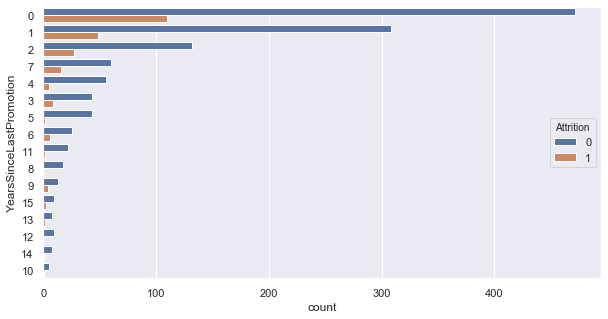

In [51]:
sns.set(style="darkgrid")
plt.figure(figsize=(10,5))
sns.countplot(y="YearsSinceLastPromotion", hue="Attrition", data=ea, order = ea["YearsSinceLastPromotion"].value_counts().index)

#### 0 years since last promotion indicates either no promotion or recently promoted (less than 1 year), this category has highest attrition rate. 

# Years With Current Manager vs Attrition

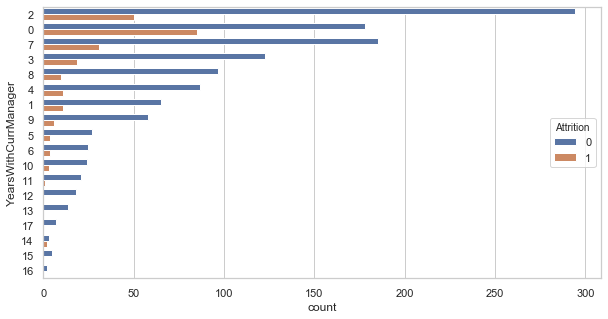

In [52]:
sns.set(style="whitegrid")
plt.figure(figsize=(10,5))
sns.countplot(y="YearsWithCurrManager", hue="Attrition", data=ea,order = ea["YearsWithCurrManager"].value_counts().index)

#### Findings-
Employees who has spend less than 1 year with current manager has highest attrition rate.

## Let's summarise the findings from this EDA: 

1. The dataset does not feature any missing or erroneous data values, and all features are of the correct data type.
2. The dataset is imbalanced with the majoriy of observations describing Currently Active Employees.
3. Several features (ie columns) are redundant for our analysis, namely: EmployeeCount, EmployeeNumber, StandardHours, and Over18.

##### Other observations include:

1. Single employees show the largest proportion of leavers, compared to Married and Divorced counterparts.
2. Loyal employees with higher salaries and more responsbilities show lower proportion of leavers compared to their       counterparts.
3. People who travel frequently show higher proportion of leavers compared to their counterparts.
4. People who have to work overtime show higher proportion of leavers compared to their counterparts.
5. Employee who work as Sales Representatives show a significant percentage of Leavers in the submitted dataset.
6. Employees who has spend less than 1 year with current manager has highest attrition rate.
7. Employees having bachelor's degree are likely to quit the job.
8. Employees who are having low relationship satisfaction are more likely to quit.
9. Low attrition rate in the employees who have completed more the 11 years in the company.
10. Employees who has spend less than 1 year with current manager has highest attrition rate.
11. Employees that have already worked at several companies previously show higher proportion of leavers compared to their counterparts.

# Feature Engineering

### Converting Non Numeric data to Numeric 

In [52]:
ea.BusinessTravel.replace({"Non-Travel":0,"Travel_Frequently":1,"Travel_Rarely":2},inplace=True)
ea.Department.replace({"Human Resources":0,"Research & Development":1,"Sales":2},inplace=True)
ea.EducationField.replace({"Human Resources":0,"Life Sciences":1,"Marketing":2,"Medical":3,"Other":4,"Technical Degree":5},inplace=True)
ea.Gender.replace({"Male":1,"Female":0},inplace=True)
ea.JobRole.replace({"Healthcare Representative":0,"Human Resources":1,"Laboratory Technician":2,"Manager":3,"Manufacturing Director":4,"Research Director":5,"Research Scientist":6,"Sales Executive":7,"Sales Representative":8},inplace=True)
ea.OverTime.replace({"Yes":1,"No":2},inplace=True)

In [54]:
ea.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,2,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,2,12,3,4,1,6,3,3,2,2,2,2


In [55]:
ea.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.607483,802.485714,1.260544,9.192517,2.912925,2.247619,1024.865306,2.721769,0.600000,65.891156,2.729932,2.063946,4.458503,2.728571,1.097279,6502.931293,14313.103401,2.693197,1.717007,15.209524,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.665455,403.509100,0.527792,8.106864,1.024165,1.331369,602.024335,1.093082,0.490065,20.329428,0.711561,1.106940,2.461821,1.102846,0.730121,4707.956783,7117.786044,2.498009,0.450606,3.659938,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,102.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,30.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1009.000000,2094.000000,0.000000,1.000000,11.000000,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,465.000000,1.000000,2.000000,2.000000,1.000000,491.250000,2.000000,0.000000,48.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2911.000000,8047.000000,1.000000,1.000000,12.000000,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,2.000000,802.000000,1.000000,7.000000,3.000000,2.000000,1020.500000,3.000000,1.000000,66.000000,3.000000,2.000000,5.000000,3.000000,1.000000,4919.000000,14235.500000,2.000000,2.000000,14.000000,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,2.000000,1157.000000,2.000000,14.000000,4.000000,3.000000,1555.750000,4.000000,1.000000,83.750000,3.000000,3.000000,7.000000,4.000000,2.000000,8379.000000,20461.500000,4.000000,2.000000,18.000000,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,1499.000000,2.000000,29.000000,5.000000,5.000000,2068.000000,4.000000,1.000000,100.000000,4.000000,5.000000,8.000000,4.000000,2.000000,19999.000000,26999.000000,9.000000,2.000000,25.000000,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# Feature Selection

In [53]:
ea_x=ea.drop(['Attrition'], axis=1)

In [54]:
ea_x.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,5130,24907,1,2,23,4,4,1,10,3,3,10,7,1,7
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,3468,16632,9,2,12,3,4,1,6,3,3,2,2,2,2


In [55]:
ea_x.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [56]:
ea_y=ea[['Attrition']]

In [57]:
ea_y.columns

Index(['Attrition'], dtype='object')

In [58]:
ea_y.head()

,Attrition
0,1
1,0
2,1
3,0
4,0


In [59]:
len(ea.columns)

32

In [60]:
ea_x_train,ea_x_test,ea_y_train,ea_y_test=train_test_split(ea_x,ea_y,test_size=.2,random_state=101)

In [61]:
ea_x_train.shape

(1176, 31)

In [62]:
ea_y_train.shape

(1176, 1)

In [63]:
ea_x_test.shape

(294, 31)

In [64]:
ea_y_test.shape

(294, 1)

# 1. Decision Tree

In [65]:
dtree=DecisionTreeClassifier()

In [61]:
dtree.fit(ea_x_train,ea_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [62]:
pred_dt=dtree.predict(ea_x_test)

In [63]:
table=confusion_matrix(pred_dt,ea_y_test)

In [64]:
table

array([[221,  35],
       [ 28,  10]], dtype=int64)

In [65]:
dtree.feature_importances_

array([0.07544602, 0.01168122, 0.09704655, 0.00995935, 0.06480087,
       0.01806399, 0.00565872, 0.00694237, 0.00466845, 0.06034219,
       0.03933865, 0.00199285, 0.05658652, 0.0217996 , 0.00518716,
       0.12872282, 0.05278245, 0.02186313, 0.05908946, 0.03573486,
       0.        , 0.02441662, 0.03755902, 0.04236044, 0.03177063,
       0.00668093, 0.02138805, 0.03169547, 0.02150994, 0.00491166])

In [66]:
ea_x_train.columns

Index(['Age', 'BusinessTravel', 'DailyRate', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [67]:
df=pd.DataFrame({"Feature":ea_x_train.columns,"Importance":dtree.feature_importances_})

In [68]:
df.sort_values(['Importance'],ascending=False)

,Feature,Importance
15,MonthlyIncome,0.128723
2,DailyRate,0.097047
0,Age,0.075446
4,DistanceFromHome,0.064801
9,HourlyRate,0.060342
18,OverTime,0.059089
12,JobRole,0.056587
16,MonthlyRate,0.052782
23,TotalWorkingYears,0.042360
10,JobInvolvement,0.039339


# 2. Select K Best

In [69]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [70]:
test=SelectKBest(score_func=chi2,k='all')

In [71]:
fitted_ea=test.fit(ea_x,ea_y)

In [72]:
print(fitted_ea.scores_)

[8.41552768e+01 2.20269350e-06 9.56580494e+02 1.32929732e+00
 6.37721416e+01 5.20642224e-01 8.34911631e-01 6.89059434e+00
 5.10086544e-01 4.31779090e-01 4.60561607e+00 2.49392423e+01
 9.00444847e+00 7.01194663e+00 1.87456575e+01 1.27922294e+05
 1.19663355e+03 6.43865444e+00 1.05228002e+01 2.35026858e-01
 5.06064443e-04 1.33233286e+00 2.52688260e+01 2.30721618e+02
 3.08579616e+00 1.08554296e+00 1.42100054e+02 1.17522596e+02
 7.60172347e+00 1.10671534e+02]


In [73]:
df1=pd.DataFrame({"Feature":ea_x_train.columns,"Important feature":fitted_ea.scores_})

In [74]:
df1.sort_values(['Important feature'],ascending=False)

,Feature,Important feature
15,MonthlyIncome,127922.293694
16,MonthlyRate,1196.633553
2,DailyRate,956.580494
23,TotalWorkingYears,230.721618
26,YearsAtCompany,142.100054
27,YearsInCurrentRole,117.522596
29,YearsWithCurrManager,110.671534
0,Age,84.155277
4,DistanceFromHome,63.772142
22,StockOptionLevel,25.268826


# 3. Boruta

In [76]:
from boruta import BorutaPy

In [77]:
ea_x=np.array(ea_x)
ea_y=np.array(ea_y)

In [78]:
rf=RandomForestClassifier()

In [79]:
ea_x+np.array(ea_x)

array([[  82,    4, 2204, ...,    8,    0,   10],
       [  98,    2,  558, ...,   14,    2,   14],
       [  74,    4, 2746, ...,    0,    0,    0],
       ...,
       [  54,    4,  310, ...,    4,    0,    6],
       [  98,    2, 2046, ...,   12,    0,   16],
       [  68,    4, 1256, ...,    6,    2,    4]], dtype=int64)

In [80]:
boruta_feature_selector=BorutaPy(rf,random_state=111,max_iter=45,perc=100,verbose=2)

In [81]:
boruta_feature_selector.fit(ea_x,ea_y)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	1 / 45
Confirmed: 	0
Tentative: 	30
Rejected: 	0


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	2 / 45
Confirmed: 	0
Tentative: 	30
Rejected: 	0


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	3 / 45
Confirmed: 	0
Tentative: 	30
Rejected: 	0


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	4 / 45
Confirmed: 	0
Tentative: 	30
Rejected: 	0


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	5 / 45
Confirmed: 	0
Tentative: 	30
Rejected: 	0


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	6 / 45
Confirmed: 	0
Tentative: 	30
Rejected: 	0


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	7 / 45
Confirmed: 	0
Tentative: 	30
Rejected: 	0


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	8 / 45
Confirmed: 	4
Tentative: 	2
Rejected: 	24


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	9 / 45
Confirmed: 	4
Tentative: 	2
Rejected: 	24


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	10 / 45
Confirmed: 	4
Tentative: 	2
Rejected: 	24


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	11 / 45
Confirmed: 	4
Tentative: 	2
Rejected: 	24


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	12 / 45
Confirmed: 	4
Tentative: 	2
Rejected: 	24


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	13 / 45
Confirmed: 	4
Tentative: 	2
Rejected: 	24


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	14 / 45
Confirmed: 	4
Tentative: 	2
Rejected: 	24


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	15 / 45
Confirmed: 	4
Tentative: 	2
Rejected: 	24


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	16 / 45
Confirmed: 	4
Tentative: 	1
Rejected: 	25


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	17 / 45
Confirmed: 	4
Tentative: 	1
Rejected: 	25


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	18 / 45
Confirmed: 	4
Tentative: 	1
Rejected: 	25


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	19 / 45
Confirmed: 	4
Tentative: 	1
Rejected: 	25


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	20 / 45
Confirmed: 	4
Tentative: 	1
Rejected: 	25


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	21 / 45
Confirmed: 	4
Tentative: 	1
Rejected: 	25


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	22 / 45
Confirmed: 	4
Tentative: 	1
Rejected: 	25


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	23 / 45
Confirmed: 	4
Tentative: 	1
Rejected: 	25


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	24 / 45
Confirmed: 	4
Tentative: 	1
Rejected: 	25


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	25 / 45
Confirmed: 	4
Tentative: 	1
Rejected: 	25


C:\Users\Dell\Anaconda3\lib\site-packages\boruta\boruta_py.py:384: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.estimator.fit(X, y)


Iteration: 	26 / 45
Confirmed: 	5
Tentative: 	0
Rejected: 	25


BorutaPy finished running.

Iteration: 	27 / 45
Confirmed: 	5
Tentative: 	0
Rejected: 	25


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight=None, criterion='gini',
                                          max_depth=None, max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=1000, n_jobs=None,
                                          oob_score=False,
                                          random_state=<mtrand.RandomState object at 0x0000000016D7C598>,
                                          verbose=0, warm_start=False),
         max_iter=45, n

In [82]:
boruta_feature_selector.support_

array([ True, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False,  True, False, False,
        True, False, False, False, False,  True, False, False, False,
       False, False, False])

In [83]:
df2=pd.DataFrame({"Feature column name":ea_x_train.columns,"Imp":boruta_feature_selector.support_})

In [84]:
df2.sort_values(['Imp'],ascending=False)

,Feature column name,Imp
0,Age,True
18,OverTime,True
23,TotalWorkingYears,True
15,MonthlyIncome,True
2,DailyRate,True
4,DistanceFromHome,False
5,Education,False
28,YearsSinceLastPromotion,False
27,YearsInCurrentRole,False
26,YearsAtCompany,False


# Smote (To Handle Unbalanced Dataset)

In [66]:
minority_attrition_df =ea[ea['Attrition']==1]
majority_attrition_df =ea[ea['Attrition']==0]    #Get the positive negative attrition dataset.

In [67]:
print(minority_attrition_df.shape,majority_attrition_df.shape)

(237, 32) (1233, 32)


In [68]:
import imblearn
from imblearn.combine import SMOTETomek

In [69]:
smk=SMOTETomek(random_state=42)

In [70]:
atr_x,atr_y=smk.fit_sample(ea_x,ea_y)  #Implementing oversampling for handling imbalanced.

In [71]:
atr_x.shape,atr_y.shape

((2370, 31), (2370, 1))

#### Removing Less Important Features 

In [72]:
atr_x.drop(['EmployeeNumber','PerformanceRating'],inplace=True,axis=1)

####  Out of the above, few features are redundant because they either contain no information or they contain information that is not relevant to an employee’s decision to leave the company so we are removing those features.

Due to less column in data we will not remove more columns.

#  Applying machine learning algorithms

## 1. Logistic Regression 

In [73]:
logmodel=LogisticRegression()

In [74]:
atr_x_train,atr_x_test,atr_y_train,atr_y_test=train_test_split(atr_x,atr_y,test_size=.2,random_state=101)

In [75]:
atr_x_train.shape

(1896, 29)

In [76]:
atr_y_train.shape

(1896, 1)

In [77]:
atr_x_test.shape

(474, 29)

In [78]:
atr_y_test.shape

(474, 1)

In [79]:
logmodel.fit(atr_x_train,atr_y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [80]:
pred=logmodel.predict(atr_x_test)

In [81]:
pred_prob=logmodel.predict_proba(atr_x_test)

In [82]:
pred_prob

array([[0.21047317, 0.78952683],
       [0.60934807, 0.39065193],
       [0.30805247, 0.69194753],
       [0.15098728, 0.84901272],
       [0.16309516, 0.83690484],
       [0.3358837 , 0.6641163 ],
       [0.63741652, 0.36258348],
       [0.73355255, 0.26644745],
       [0.44062711, 0.55937289],
       [0.74761524, 0.25238476],
       [0.32843501, 0.67156499],
       [0.57162014, 0.42837986],
       [0.40563198, 0.59436802],
       [0.19477765, 0.80522235],
       [0.83388757, 0.16611243],
       [0.47610548, 0.52389452],
       [0.78832303, 0.21167697],
       [0.31358048, 0.68641952],
       [0.42659554, 0.57340446],
       [0.64819435, 0.35180565],
       [0.87370952, 0.12629048],
       [0.17064177, 0.82935823],
       [0.75067337, 0.24932663],
       [0.28503663, 0.71496337],
       [0.9375415 , 0.0624585 ],
       [0.49660626, 0.50339374],
       [0.95474117, 0.04525883],
       [0.89807858, 0.10192142],
       [0.95677815, 0.04322185],
       [0.82862495, 0.17137505],
       [0.

In [83]:
log_tab=confusion_matrix(pred,atr_y_test)

In [84]:
log_tab

array([[187,  57],
       [ 66, 164]], dtype=int64)

In [85]:
log_kappa=cohen_kappa_score(pred,atr_y_test)
log_kappa

0.4799757389799668

In [86]:
log_rep=print(classification_report(pred,atr_y_test))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75       244
           1       0.74      0.71      0.73       230

    accuracy                           0.74       474
   macro avg       0.74      0.74      0.74       474
weighted avg       0.74      0.74      0.74       474



### AUROC

In [42]:
logmodel.fit(atr_x_train,atr_y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
pred_val=logmodel.predict(atr_x_test)

In [44]:
log_roc_auc=roc_auc_score(atr_y_test,pred_val)

In [45]:
log_roc_auc

0.7406059413732048

In [46]:
pred_val_proba=logmodel.predict_proba(atr_x_test)

In [48]:
pred_val_proba=pd.DataFrame(pred_val_proba)

In [49]:
pred_val_proba

,0,1
0,0.210473,0.789527
1,0.609348,0.390652
2,0.308052,0.691948
3,0.150987,0.849013
4,0.163095,0.836905
5,0.335884,0.664116
6,0.637417,0.362583
7,0.733553,0.266447
8,0.440627,0.559373
9,0.747615,0.252385


In [50]:
pred_val_proba1=pred_val_proba.iloc[:,1]

In [51]:
fpr,tpr,threshold=roc_curve(atr_y_test,pred_val_proba1)

Text(0.5, 1.0, 'AUROC CURVE')

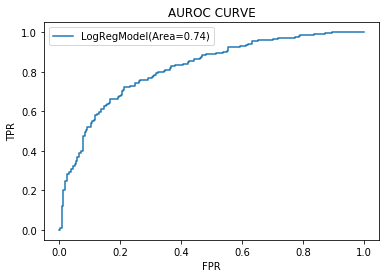

In [52]:
plt.plot(fpr,tpr,label="LogRegModel(Area=%.2f)"% log_roc_auc)
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='upper left')
plt.title("AUROC CURVE")

### Precision Recall 

In [53]:
f1=f1_score(atr_y_test,pred_val)

In [54]:
f1

0.7272727272727273

In [55]:
precision,recall,threshold=precision_recall_curve(atr_y_test,pred_val_proba1)

Text(0.5, 1.0, 'Precision-Recall')

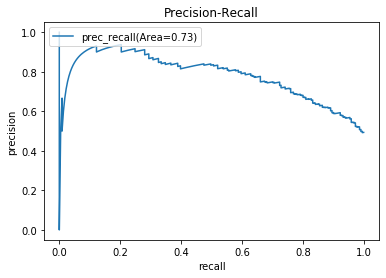

In [56]:
plt.plot(recall,precision,label="prec_recall(Area=%.2f)"% f1)
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc="upper left")
plt.title("Precision-Recall")

## 2. Decision Tree 

In [87]:
dtree=DecisionTreeClassifier()

In [88]:
dtree.fit(atr_x_train,atr_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [89]:
pred_dt=dtree.predict(atr_x_test)

In [90]:
dt_tab=confusion_matrix(pred_dt,atr_y_test)

In [91]:
dt_tab

array([[208,  30],
       [ 45, 191]], dtype=int64)

In [92]:
dt_kappa=cohen_kappa_score(pred_dt,atr_y_test)
dt_kappa

0.6834541342403789

In [63]:
dt_rep=print(classification_report(pred_dt,atr_y_test))

              precision    recall  f1-score   support

           0       0.83      0.87      0.85       242
           1       0.86      0.81      0.83       232

    accuracy                           0.84       474
   macro avg       0.84      0.84      0.84       474
weighted avg       0.84      0.84      0.84       474



## 3. Random Forest

In [93]:
rfc=RandomForestClassifier()

In [94]:
rfc.fit(atr_x_train,atr_y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [95]:
pred_rfc=rfc.predict(atr_x_test)

In [96]:
rfc_tab=confusion_matrix(pred_rfc,atr_y_test)

In [97]:
rfc_tab

array([[243,  17],
       [ 10, 204]], dtype=int64)

In [98]:
rfc_kappa=cohen_kappa_score(pred_rfc,atr_y_test)
rfc_kappa

0.8853246357592158

In [70]:
rfc_rep=print(classification_report(pred_rfc,atr_y_test))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       258
           1       0.93      0.95      0.94       216

    accuracy                           0.95       474
   macro avg       0.95      0.95      0.95       474
weighted avg       0.95      0.95      0.95       474



## 4. Naive Bayes 

In [99]:
naive_bayes=MultinomialNB()

In [100]:
naive_bayes.fit(atr_x_train,atr_y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [101]:
pred_nb=naive_bayes.predict(atr_x_test)

In [102]:
nb_tab=confusion_matrix(pred_nb,atr_y_test)

In [103]:
nb_tab

array([[129,  71],
       [124, 150]], dtype=int64)

In [104]:
nb_kappa=cohen_kappa_score(pred_nb,atr_y_test)
nb_kappa

0.18579658568383228

In [77]:
nb_rep=print(classification_report(pred_nb,atr_y_test))

              precision    recall  f1-score   support

           0       0.51      0.65      0.57       200
           1       0.68      0.55      0.61       274

    accuracy                           0.59       474
   macro avg       0.59      0.60      0.59       474
weighted avg       0.61      0.59      0.59       474



## 5. KNN

In [105]:
knn=KNeighborsClassifier(n_neighbors=5)

In [106]:
knn.fit(atr_x_train,atr_y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [107]:
knn_pred=knn.predict(atr_x_test)

In [108]:
knn_tab=confusion_matrix(knn_pred,atr_y_test)

In [109]:
knn_tab

array([[152,  25],
       [101, 196]], dtype=int64)

In [110]:
knn_kappa=cohen_kappa_score(knn_pred,atr_y_test)
knn_kappa

0.47728824239878176

In [84]:
knn_rep=print(classification_report(knn_pred,atr_y_test))

              precision    recall  f1-score   support

           0       0.60      0.86      0.71       177
           1       0.89      0.66      0.76       297

    accuracy                           0.73       474
   macro avg       0.74      0.76      0.73       474
weighted avg       0.78      0.73      0.74       474



## 6. Support Vector Machine 

In [111]:
svc_model=SVC()

In [112]:
svc_model.fit(atr_x_train,atr_y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [113]:
pred_svc=svc_model.predict(atr_x_test)

In [114]:
svc_tab=confusion_matrix(pred_svc,atr_y_test)

In [115]:
svc_tab

array([[122,  53],
       [131, 168]], dtype=int64)

In [116]:
svc_kappa=cohen_kappa_score(pred_svc,atr_y_test)
svc_kappa

0.2371022200451356

In [91]:
svc_rep=print(classification_report(pred_svc,atr_y_test))

              precision    recall  f1-score   support

           0       0.48      0.70      0.57       175
           1       0.76      0.56      0.65       299

    accuracy                           0.61       474
   macro avg       0.62      0.63      0.61       474
weighted avg       0.66      0.61      0.62       474



## 7. AdaBoost Classifier 

In [117]:
from sklearn.ensemble import AdaBoostClassifier
abc=AdaBoostClassifier(dtree,n_estimators=50)

In [118]:
abc.fit(atr_x_train,atr_y_train)

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [119]:
pred_abc=abc.predict(atr_x_test)

In [120]:
abc_tab=confusion_matrix(pred_abc,atr_y_test)

In [121]:
abc_tab

array([[213,  29],
       [ 40, 192]], dtype=int64)

In [122]:
abc_kappa=cohen_kappa_score(pred_abc,atr_y_test)
abc_kappa

0.7084455062489972

In [98]:
abc_rep=print(classification_report(pred_abc,atr_y_test))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84       235
           1       0.86      0.80      0.83       239

    accuracy                           0.84       474
   macro avg       0.84      0.84      0.84       474
weighted avg       0.84      0.84      0.84       474



### Concluding Remarks-
1. Looks like my best models are the Random Forest and the Adaboost Classifier.
2. Factors contributing more to the employee attrition are Monthly Income, Total Working Years, YearsAtCompany,    YearsWithCurrManager, Age, OverTime, DistanceFromHome.
3. Top three job roles facing attrition-
   26% of employees who are likely to quit belong to Laboratory Technician group.
   24% of employees belong to Sales Executive group.
   19% of employees belong to Research Scientist group.

The model developed will be able to predict whether an employee will stay or not. This will help company to know the status of an employee in advance and take necessary actions to prevent loss that will incur.